In [12]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [13]:
import pandas as pd
from matplotlib import pyplot as plt
import h5py
import numpy as np
import statistics 

In [14]:
def get_reads_dict(filename):
    file = h5py.File(filename, "r")
    file = file['Reads']
    reads = []
    for r in file.keys():
        elem = {}
        elem['UUID'] = r
        for k in file[r].keys():
            elem[k]=file[r][k][()]
        reads.append(elem)
    return reads

def normalise_list(lst):
    mmin = min(lst)
    mmax = max(lst)
    lst = (lst - mmin)/(mmax - mmin)
    return lst

def are_signals_equal(s1,s2):
    if(len(s1) != len(s2)):
        return False

    are_equal = True
    for idx, val in enumerate(s1):
        if(s1[idx] != s2[idx]):
            return False
    return True

def find_matches_in_tayiaki_ouput(mapped_reads, unmapped_reads):
    matched = []
    unmatched = []

    for r1 in mapped_reads:
        s1 = r1['Dacs']
        found = None
        for r2 in unmapped_reads:
            s2 = r2['Dacs']
            if(are_signals_equal(s1,s2)):
                found = r2
        if(found != None):
            matched.append([r1,found])
        else:
            unmatched.append(r1)
    
    return matched, unmatched

def load_reads(f1,f2):
    unmapped_reads = get_reads_dict(f1)
    mapped_reads = get_reads_dict(f2)
    
    return find_matches_in_tayiaki_ouput(mapped_reads, unmapped_reads)

def get_read_attributes(read):
    #id, signal, points, labels
    return read['UUID'], normalise_list(read['Dacs']), read['Ref_to_signal'], read['Reference']

In [17]:
f1 = "./../../taiyakiOutputs/output_createfasta.hdf5"
f2 = "./../../taiyakiOutputs/output_justfromfasta.hdf5"

reads, other_reads = load_reads(f1,f2)

In [18]:
print(len(reads))
print(len(other_reads))

26
12


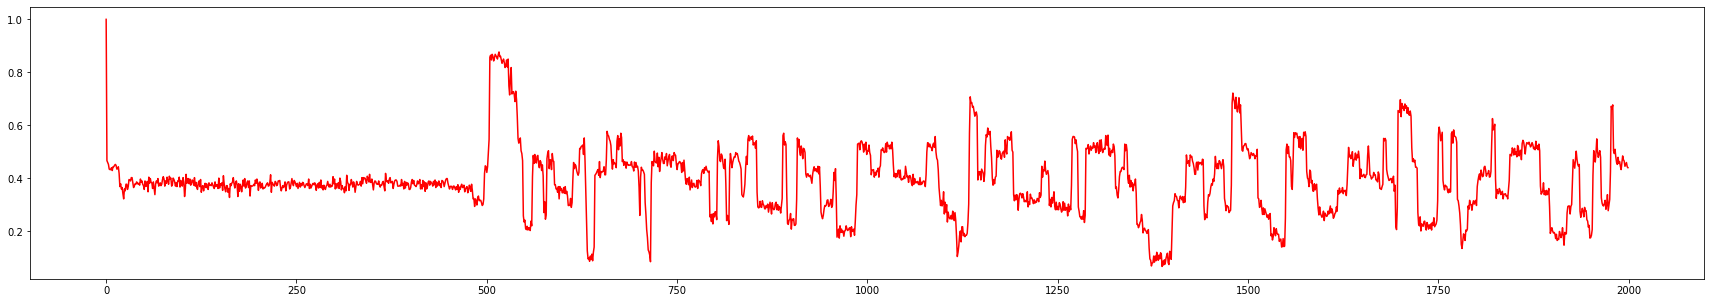

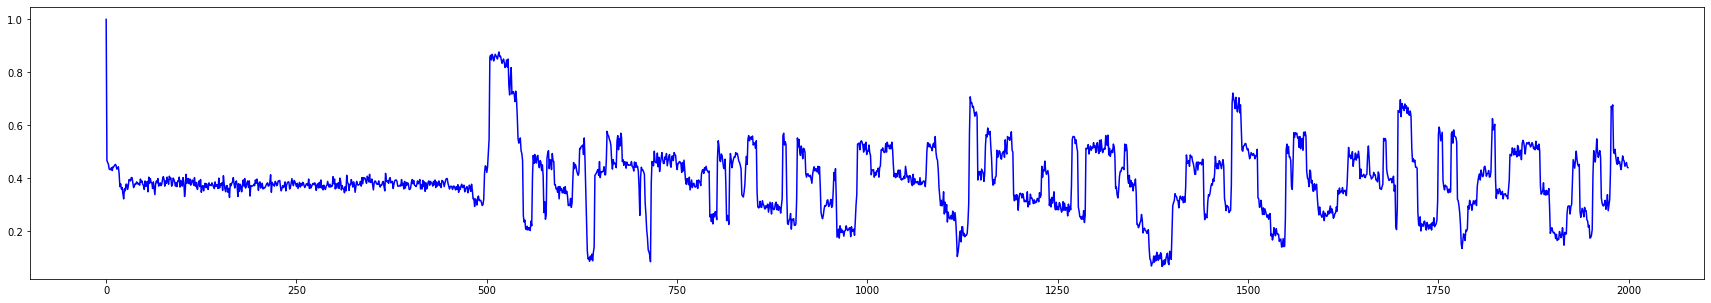

In [5]:
index = 1

_, signal1, points1, labels1 = get_read_attributes(reads[index][0])
_, signal2, points2, labels2 = get_read_attributes(reads[index][1])

plt.figure(figsize=(30,5))
plt.plot(signal1[:2000], 'r', label="mapped")
plt.show()

plt.figure(figsize=(30,5))
plt.plot(signal2[:2000], 'b', label="not mapped")
plt.show()

In [8]:
def make_dna_list(read):
    dnalist = []
    pos = 0
    signalrefs = list(read['Ref_to_signal'])
    dnaref = list(read['Reference'])
    for idx in range(len(signalrefs)):
        if idx == 0:
            dnalist.extend([-1]*signalrefs[idx])
        else:
            for i in range(signalrefs[idx]-signalrefs[idx-1]):
                dnalist.append(dnaref[idx-1])
    return dnalist

def make_labels(dna_unmapped, dna_mapped):
    DNA = []
    
    i = 0
    while(i < len(dna_mapped)):
        
        #mapped have readins
        if(dna_mapped[i] != -1):
            DNA.append(dna_mapped[i])
        #mapped dont yet have readings
        else:
            #unmapped have readings
            if(dna_unmapped[i] != -1):
                DNA.append(-1)
            #unmapped have no readings
            else:
                DNA.append(-2)
        i +=1
    
    return DNA    

05e1b8f1-a261-4aeb-b58f-adacef0a5146


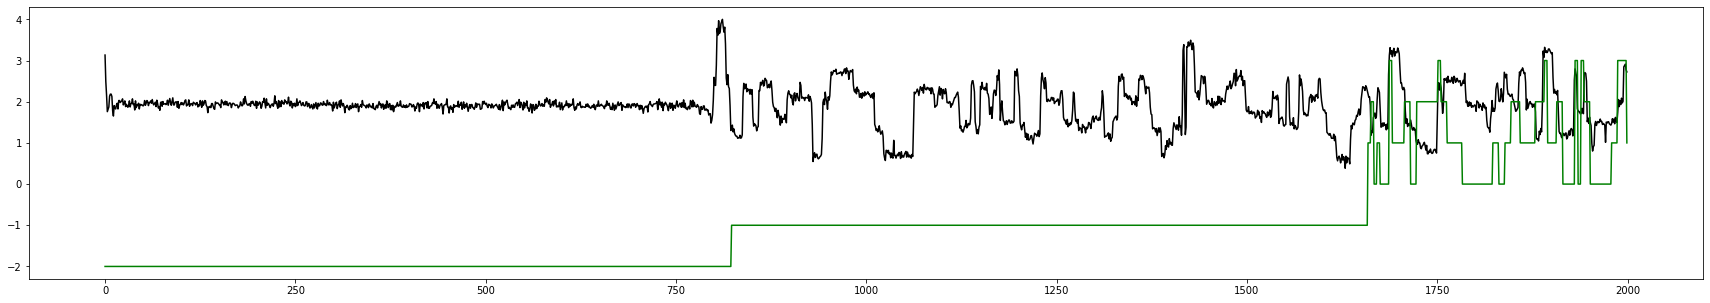

0eeebc7a-9754-408d-9884-136de4d219d0


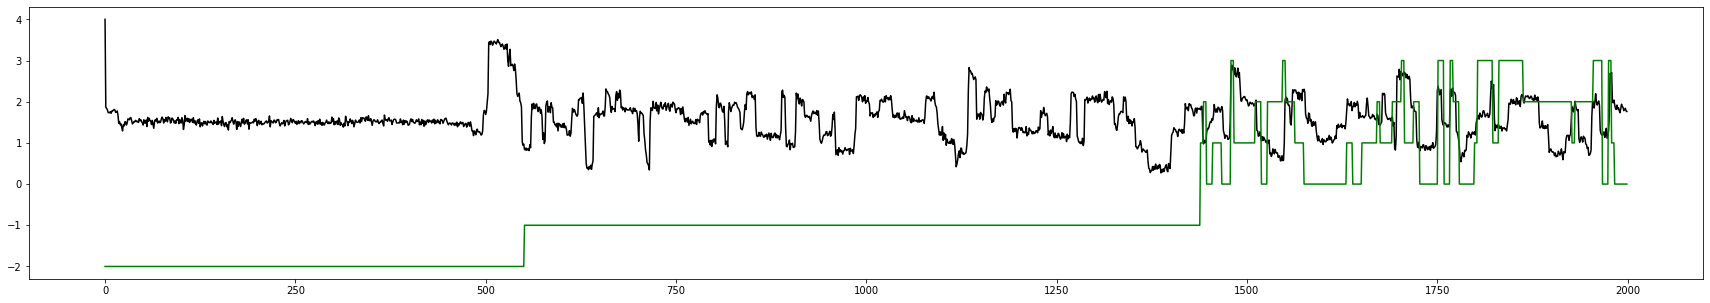

11a7cd37-5780-4304-a2f6-7ab9d486716c


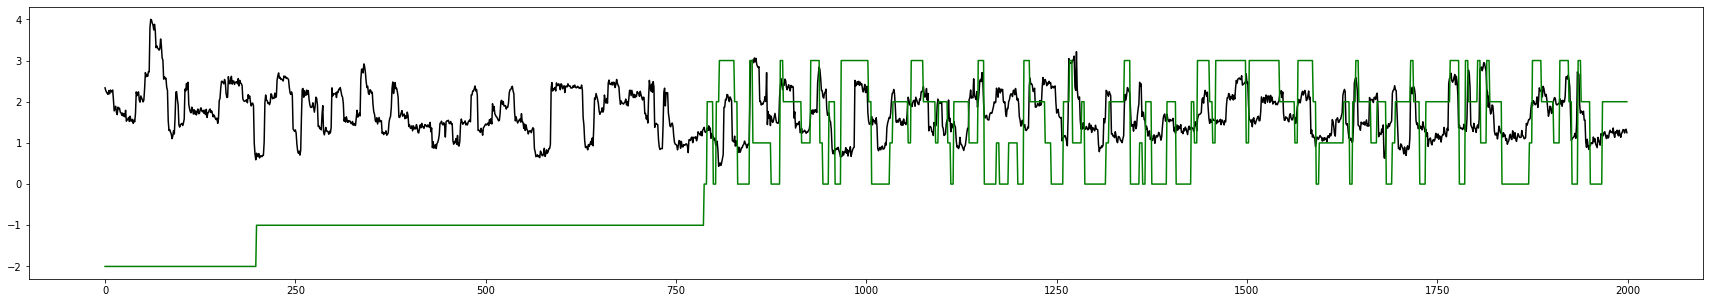

12022872-0b83-43ed-aad9-7d4c991492f1


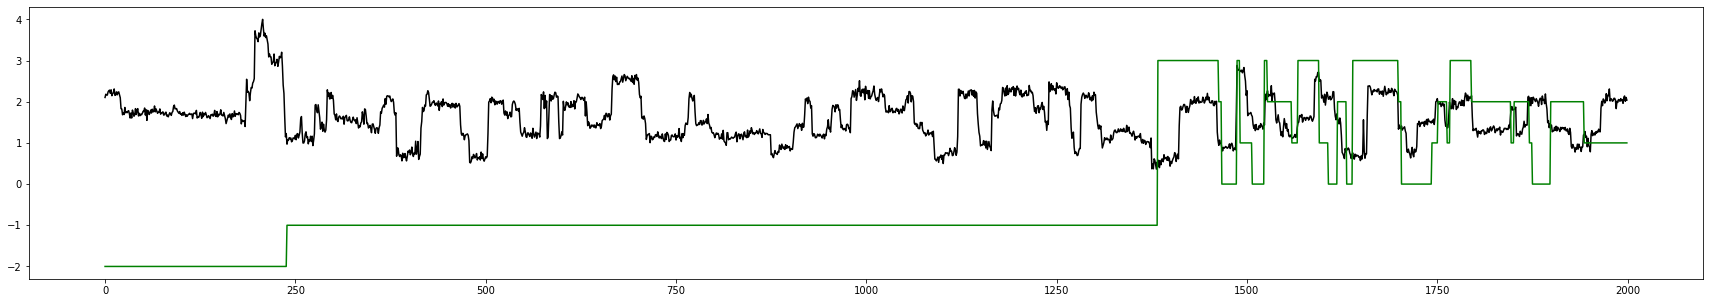

12659775-e457-489b-b29c-ab6e1638561f


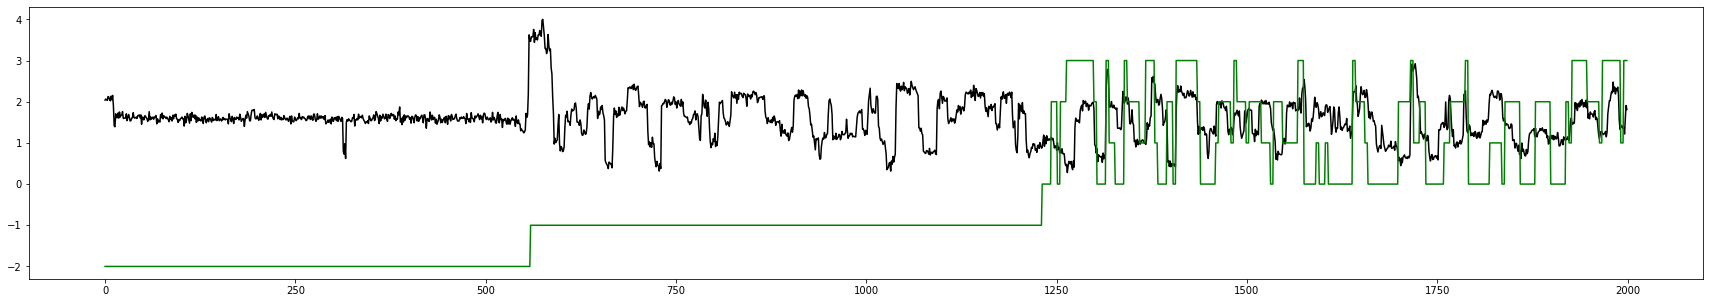

1aae1c9a-939b-4026-8016-f82e4cc89383


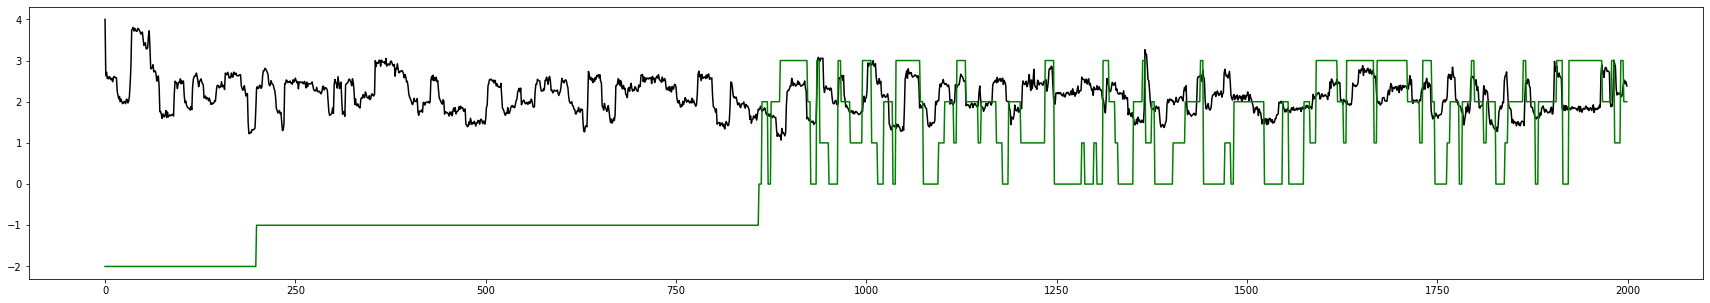

1d2fb543-6e58-4865-81fc-8c7e037eddc7


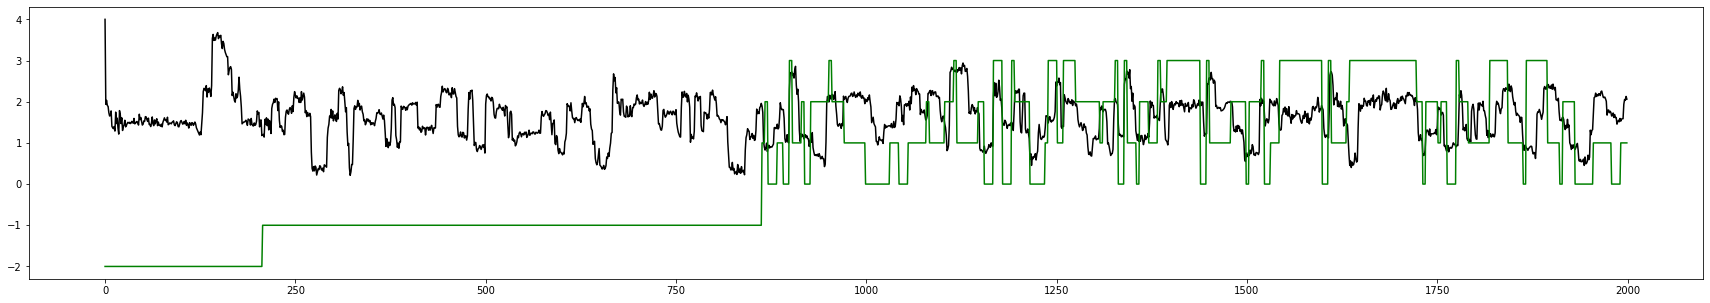

1e6aa86f-1b10-40dd-8cb4-b85a21d70956


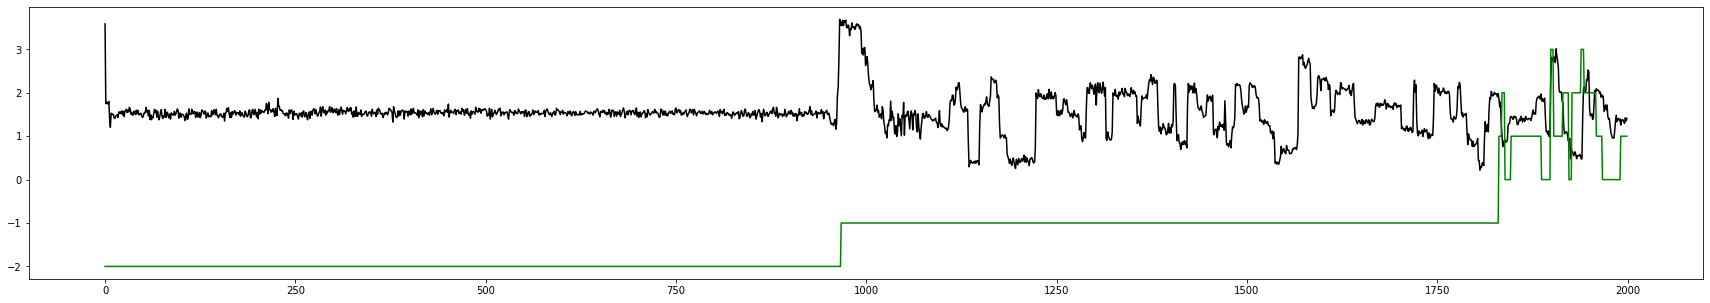

3068733d-d97d-4648-af76-4b02d217eda1


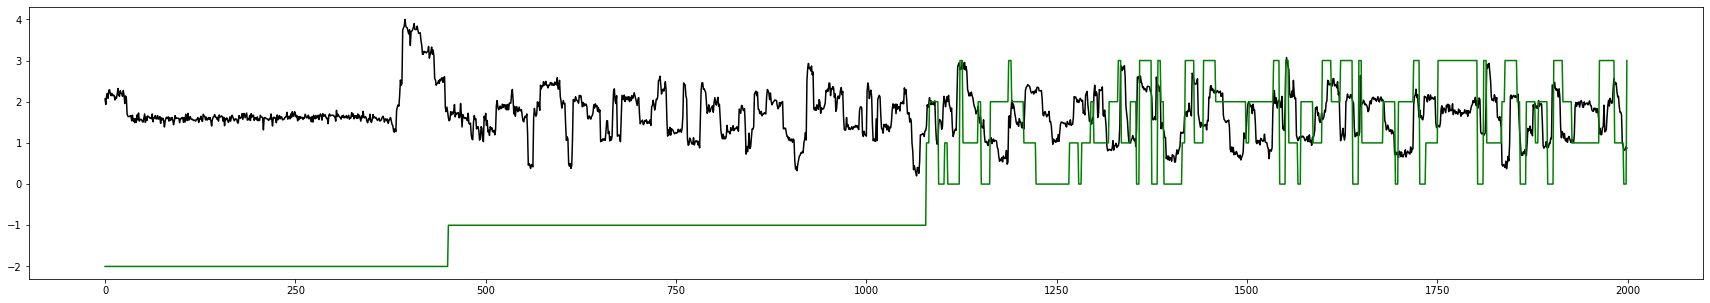

3e3d4d30-8346-40fc-8026-bd37f13b250e


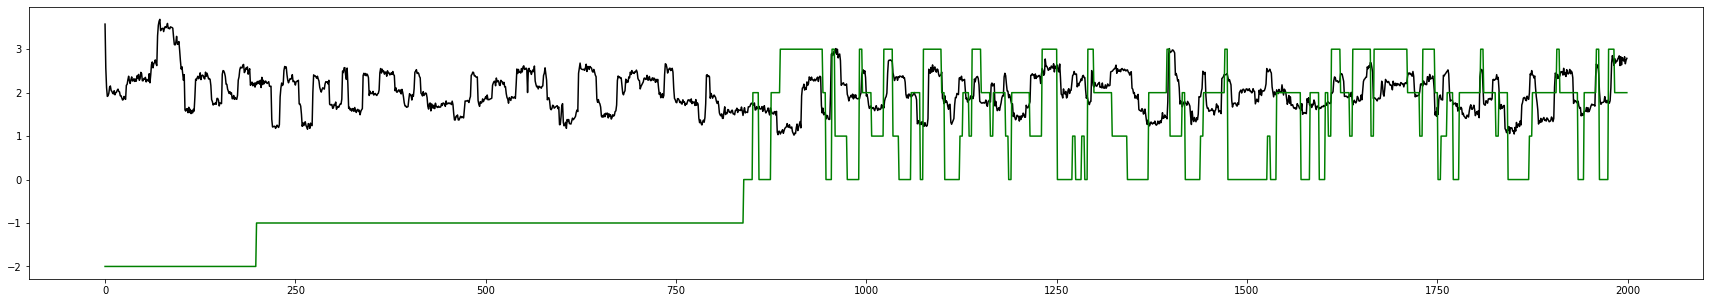

40a1b75f-434e-40e5-a7bf-c1969db6503e


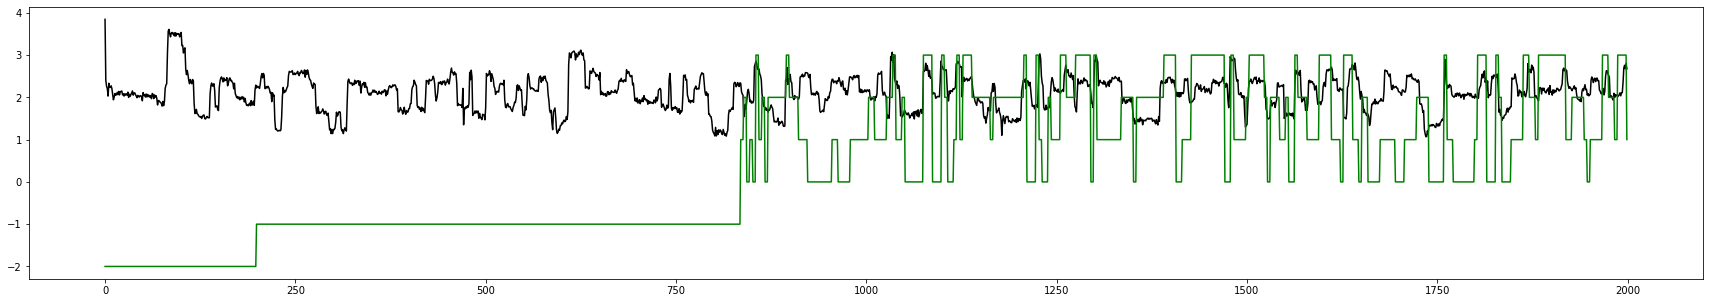

51d0ad04-fbf9-451a-878b-811125eb24bd


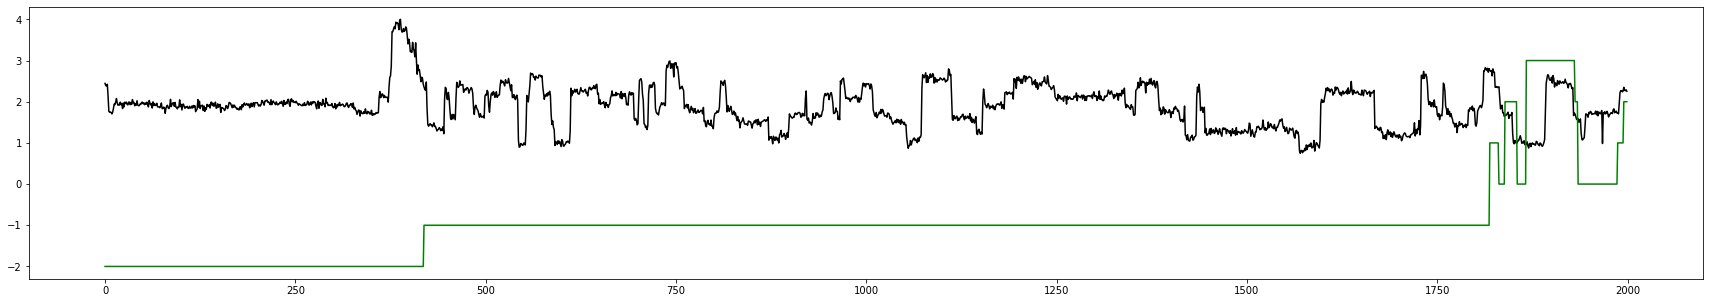

6bfd9602-b481-49f1-9abf-2b2cd942897a


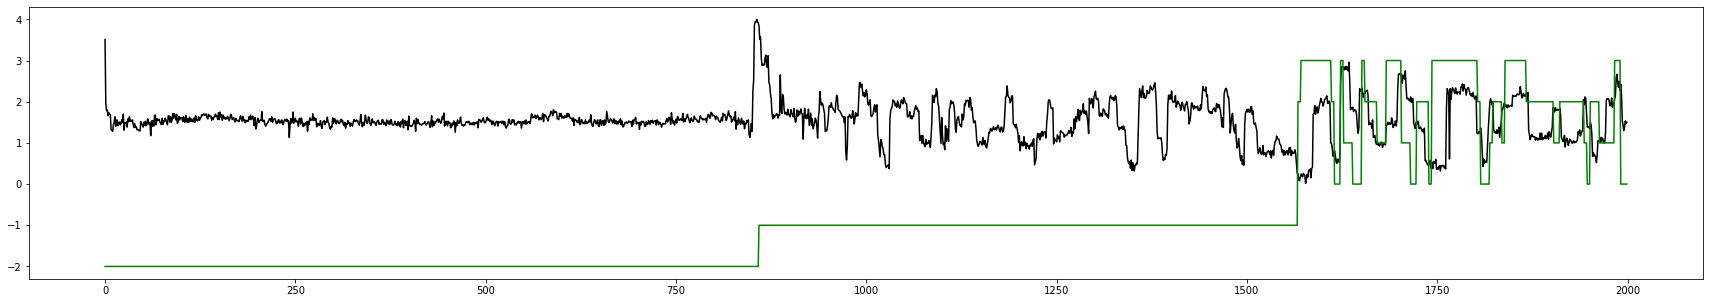

859e1bfc-efa1-4e21-a837-fb164ea200e5


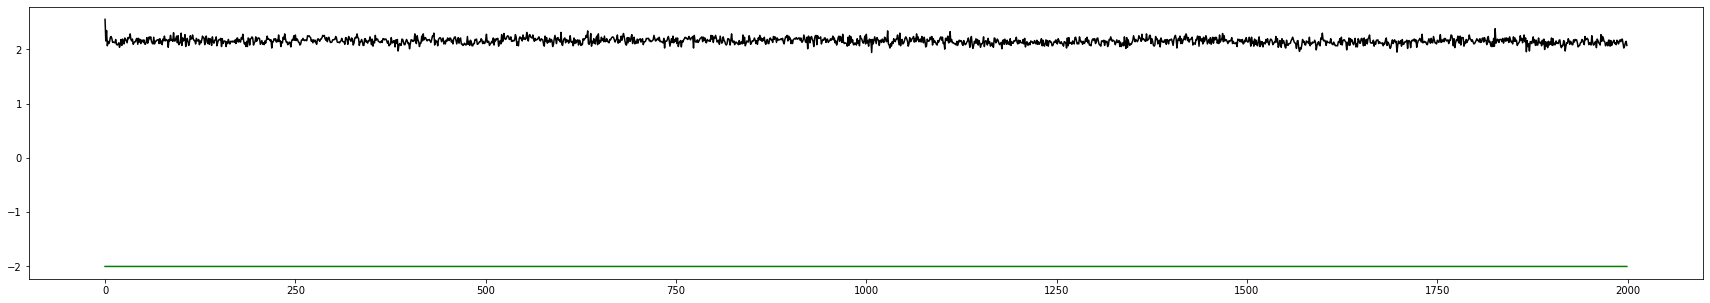

9ddf4d95-593e-4805-85f3-09113e73c2d0


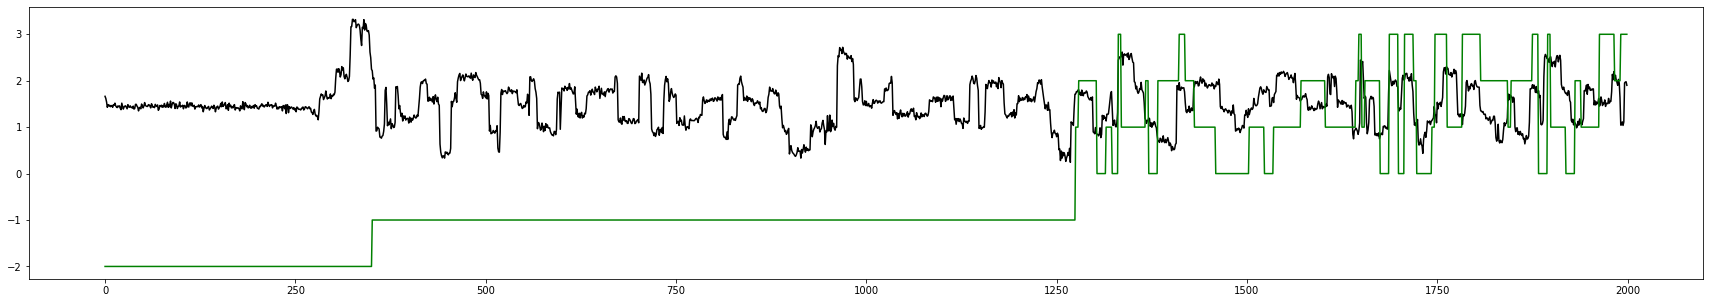

9fcf512d-748d-43af-99dd-3c3f3296ba14


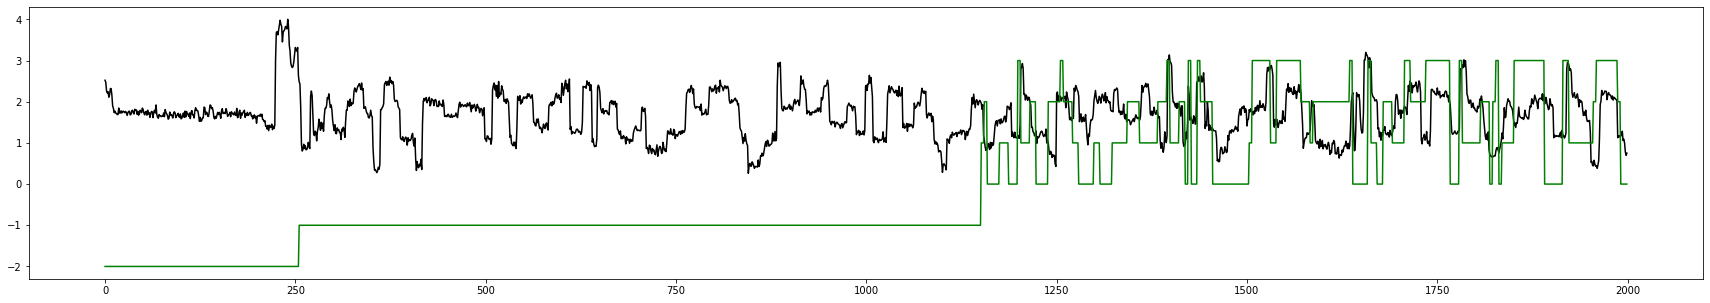

a942b291-df4f-454a-823e-52c96e814022


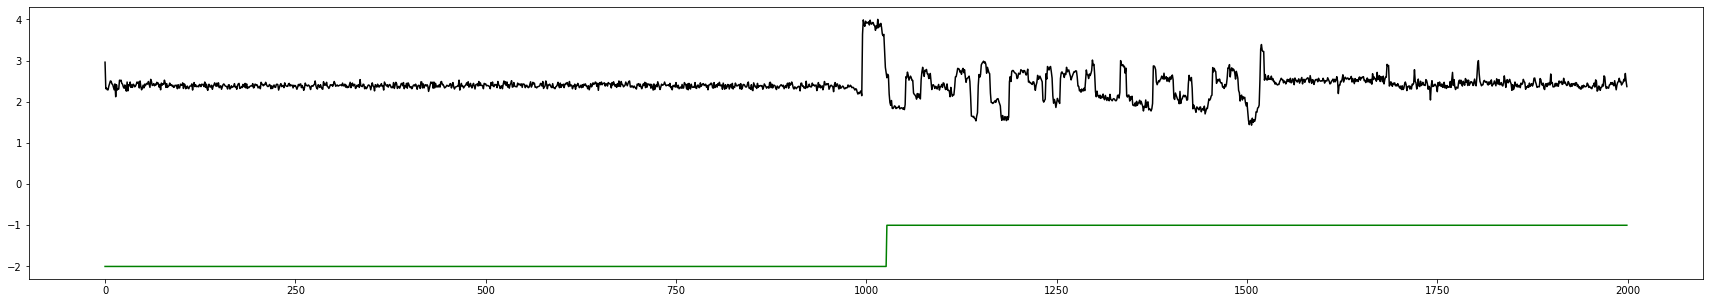

b36dbb87-0799-4eb2-9339-9dde845bf225


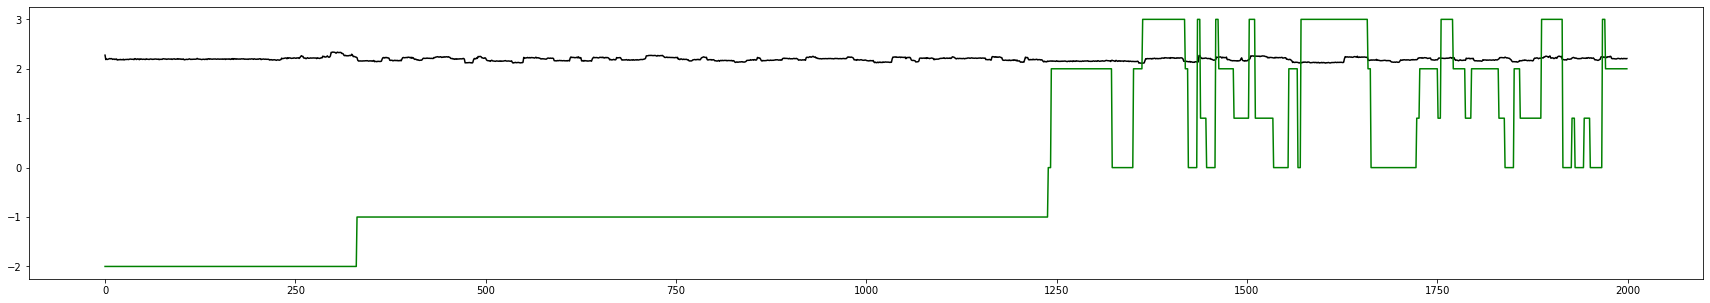

c1e0614a-ebb9-4281-b7df-f41f05e09166


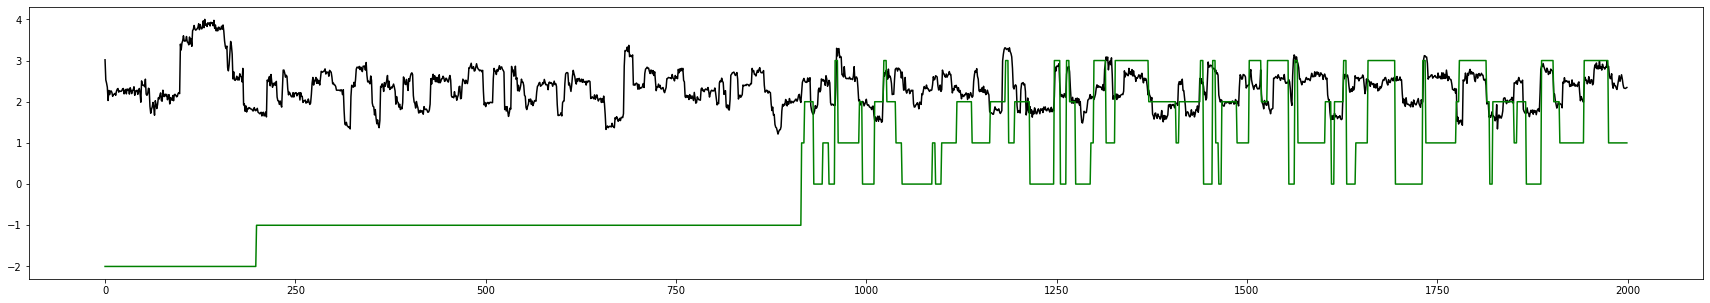

c25c3ca2-7eac-4eb9-a0eb-b03bb5eeaf82


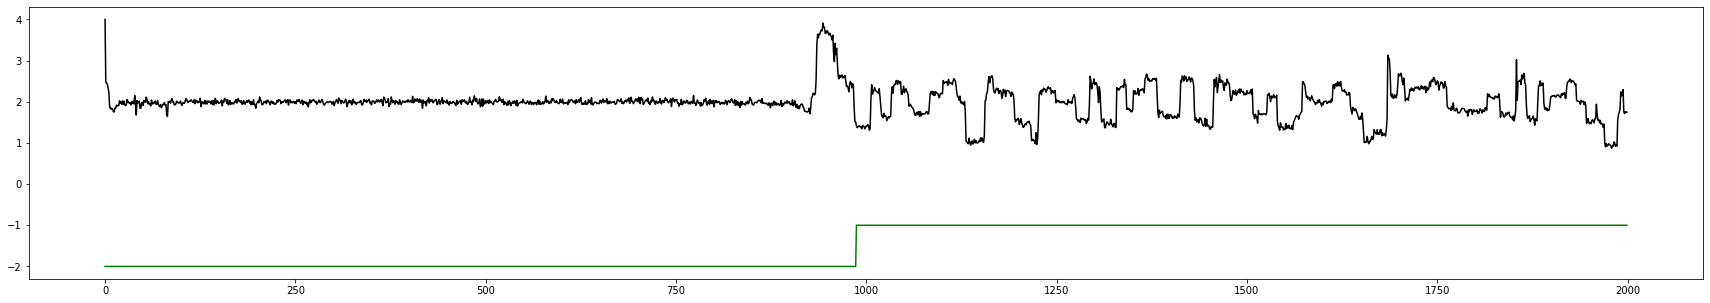

cd9d3998-175c-4ab0-8960-84a9789fa88c


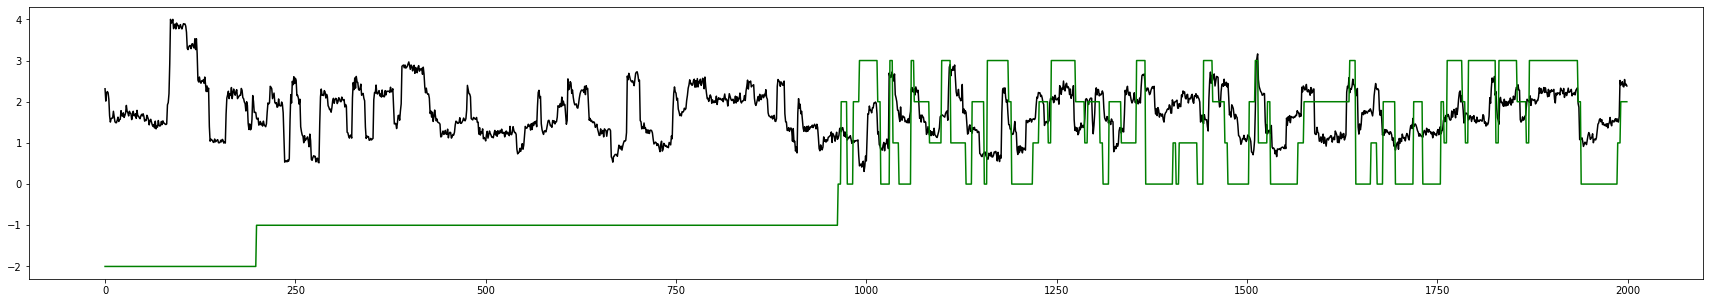

cdfc1115-6ad7-4a12-931a-7ffd83442175


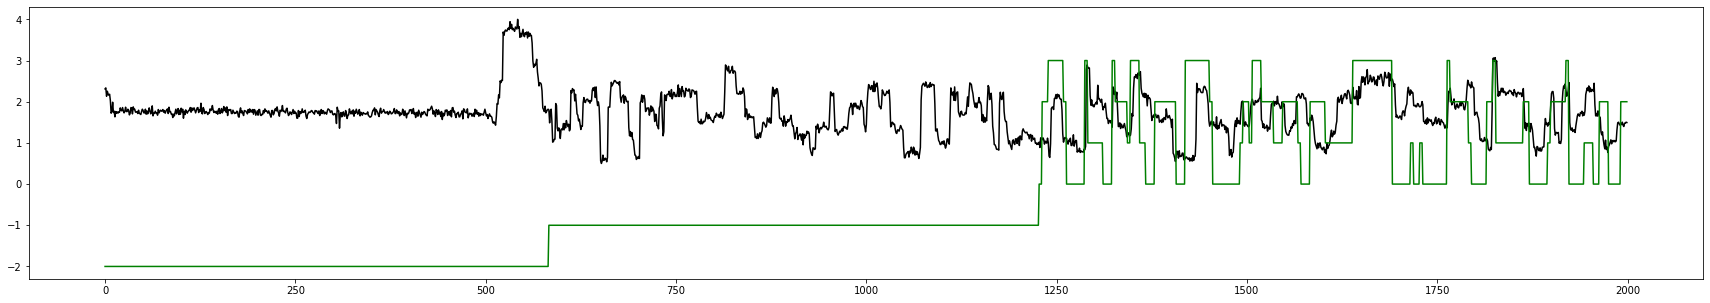

cfadf7dc-e135-4d03-9809-2df36ef5877e


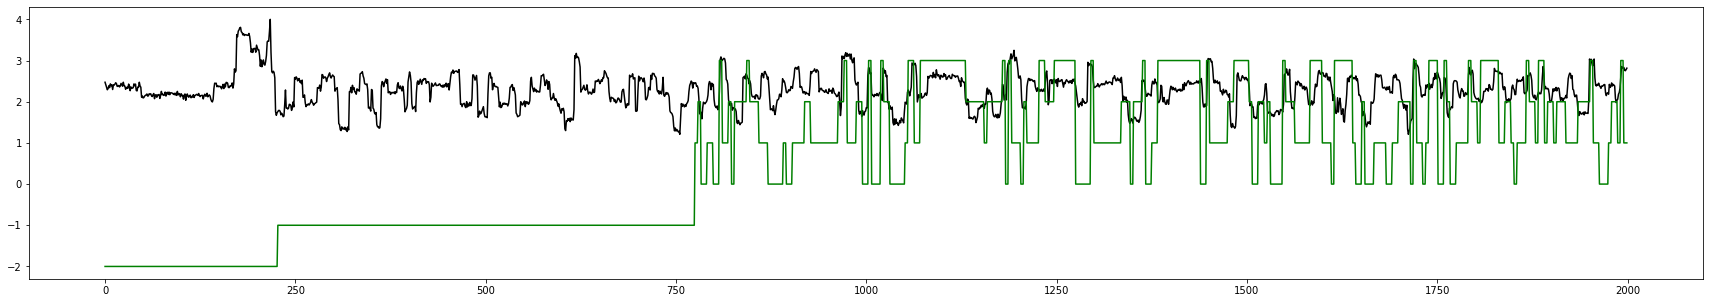

d96228b1-2747-4aa4-a591-3121a5bfae0a


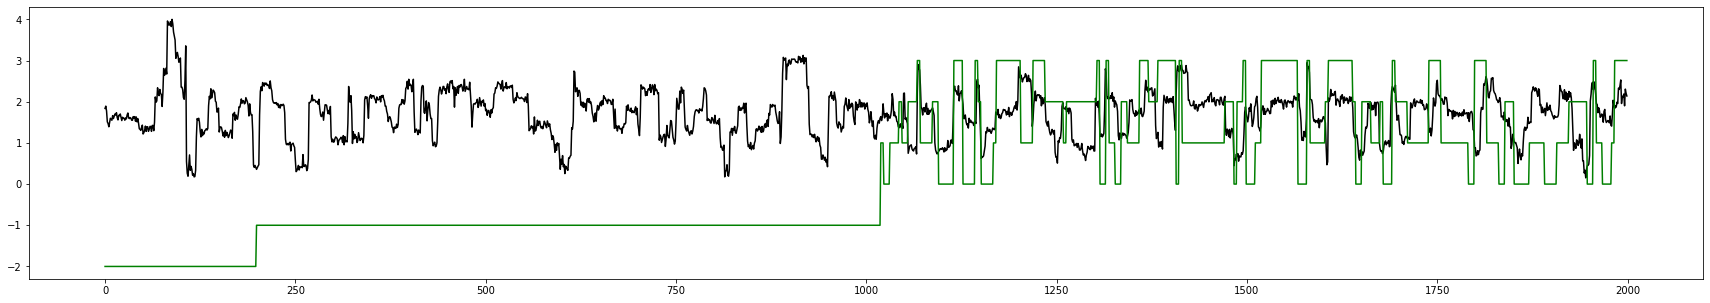

e5a0e67c-68d4-4462-9faf-5470b3456c34


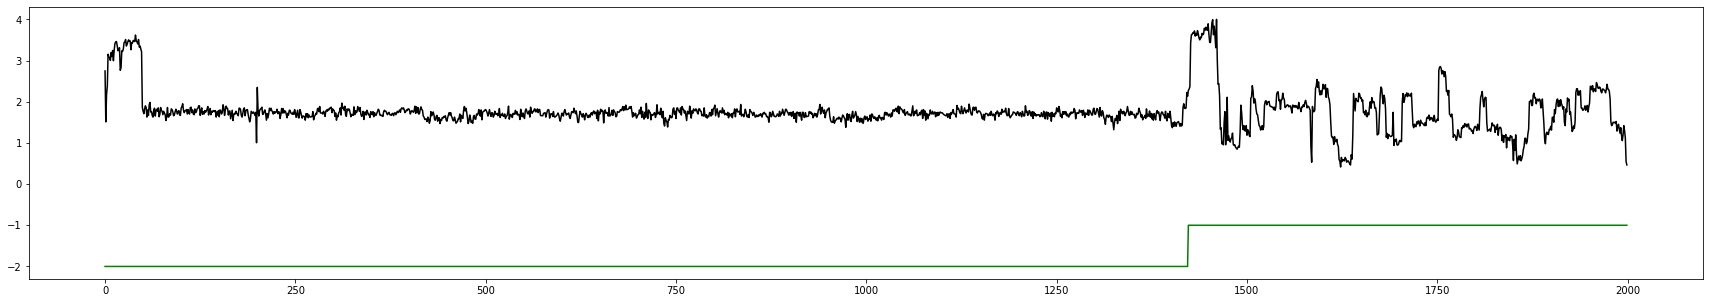

f999942a-8113-40fe-b54f-1d804cf91af4


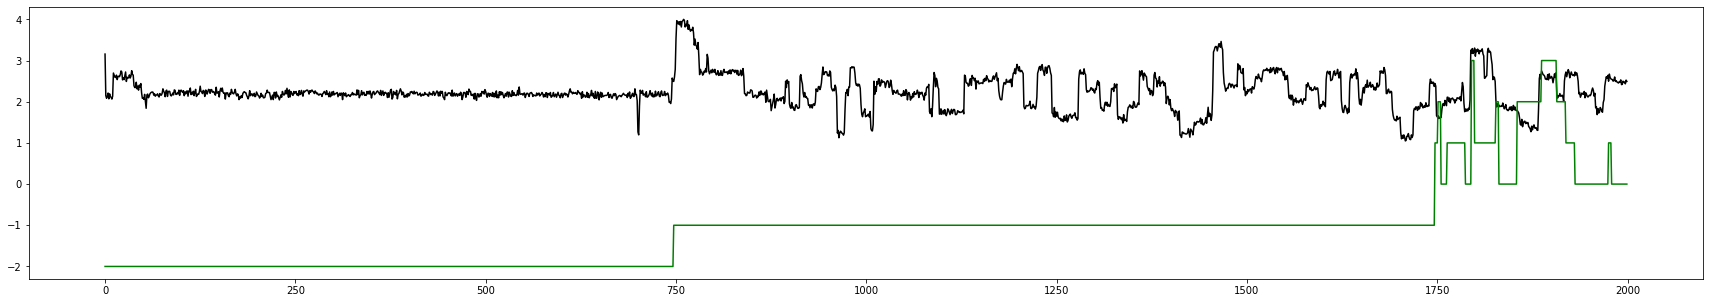

In [23]:
for index in range(len(reads)):
    #THESE TWO HAVE DIF LENGTHS?!
    dna1 = make_dna_list(reads[index][0])
    dna2 = make_dna_list(reads[index][1])
    DNA = make_labels(dna1, dna2)
    uid1, signal1, points1, labels1 = get_read_attributes(reads[index][0])
    _, signal2, points2, labels2 = get_read_attributes(reads[index][1]) 
             
    #plt.figure(figsize=(30,5))
    #plt.plot(signal1[0:2000]*4, 'k', label="raw")
    #plt.plot(dna1[0:2000], 'r', label="base")
    #plt.show()
    
    #plt.figure(figsize=(30,5))
    #plt.plot(signal1[0:2000]*4, 'k', label="raw")
    #plt.plot(dna2[0:2000], 'b', label="base")
    #plt.show()

    print(uid1)
    plt.figure(figsize=(30,5))
    plt.plot(signal1[:2000]*4, 'k', label="raw")
    plt.plot(DNA[:2000], 'g', label="DNA")
    plt.show()